<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_1_3_data_Segmenting_Kelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
path_training_data = '/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Train Features/train_labels.tar_l8u2RP0/train_kelp'
list_of_all_training_tiff_images =os.listdir(path_training_data)

In [ ]:
len(list_of_all_training_tiff_images)    #### Training size data

5635

1. Data shape/size integrity check finished successfully
2. second task is to Extract band info. All 7 bands to be segregated from training data.....



In [ ]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 29.5 MB/s eta 0:00:00


In [ ]:
import rasterio
import numpy as np
from rasterio.plot import reshape_as_raster, reshape_as_image
from rasterio.plot import adjust_band


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import normalize

In [ ]:
src = rasterio.open('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Test Features/test_features.tar_cVzb1K0/test_satellite/AA408972_satellite.tif')
print(src.meta)
print(src.nodata)

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 350, 'height': 350, 'count': 7, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
None


In [ ]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.6 MB/s eta 0:00:00


In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
import matplotlib.pyplot as plt

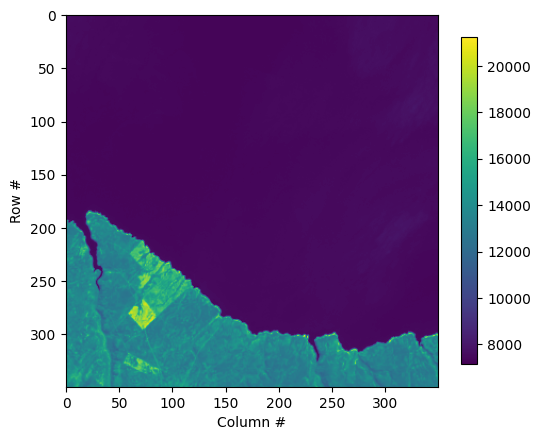

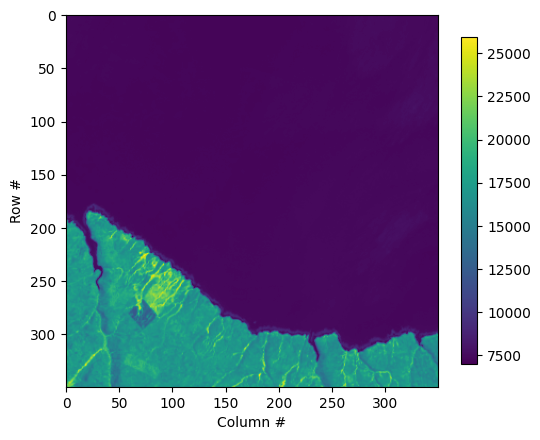

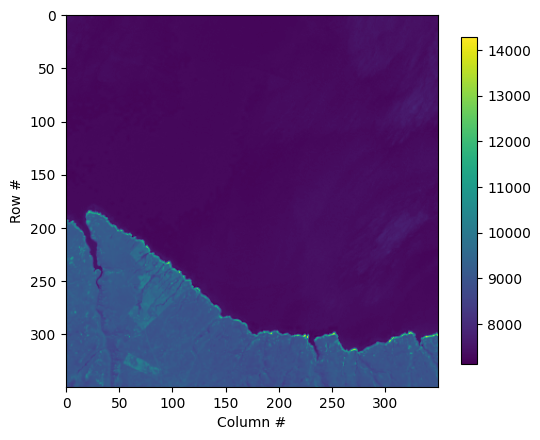

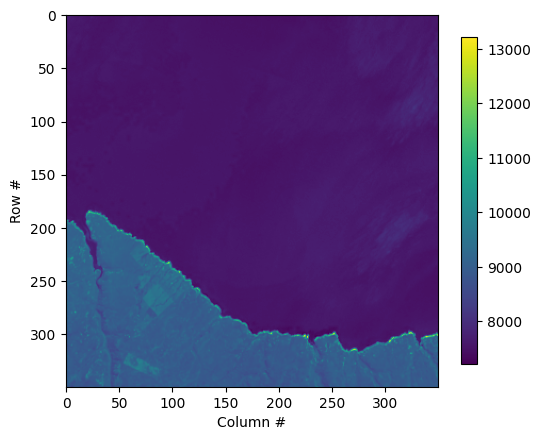

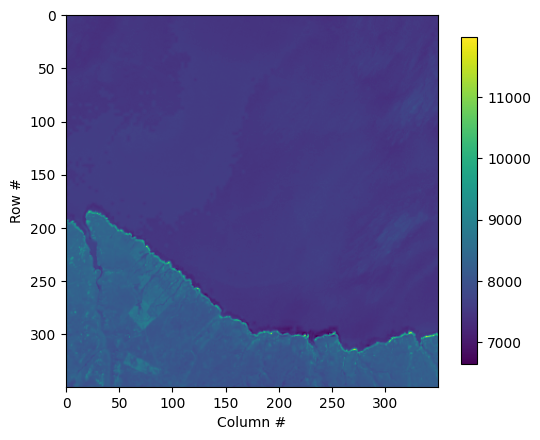

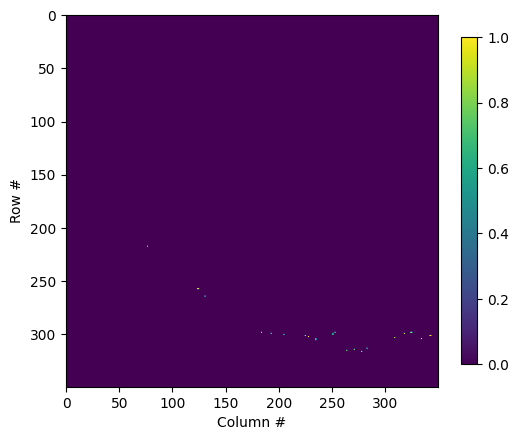

In [ ]:

for band in range(1,src.count):
  data_array=src.read(band)
  plt.figure(figsize=(6,8.5))
  plt.imshow(data_array)
  plt.colorbar(shrink=0.5)
  plt.xlabel('Column #')
  plt.ylabel('Row #')



Band 1 Coastal Aerosol (0.43 - 0.45 µm) 30 m.
Band 2 Blue (0.450 - 0.51 µm) 30 m.
Band 3 Green (0.53 - 0.59 µm) 30 m.
Band 4 Red (0.64 - 0.67 µm) 30 m.
Band 5 Near-Infrared (0.85 - 0.88 µm) 30 m.
Band 6 SWIR 1(1.57 - 1.65 µm) 30 m.
Band 7 SWIR 2 (2.11 - 2.29 µm) 30 m.

In [ ]:
Green = src.read(3)
NIR = src.read(5)

cvi = abs((Green -NIR) / (Green + NIR))

In [ ]:
cvi

array([[0.00677498, 0.00572255, 0.01024481, ..., 0.00248339, 0.00531879,
        0.00370395],
       [0.00644991, 0.0074241 , 0.00923772, ..., 0.00174661, 0.00519533,
        0.00384849],
       [0.00676303, 0.00717513, 0.00613006, ..., 0.00275667, 0.00390678,
        0.00337291],
       ...,
       [0.05960113, 0.05708981, 0.05232593, ..., 0.04462733, 0.04548879,
        0.04521277],
       [0.05654225, 0.05271173, 0.05047733, ..., 0.04605034, 0.04691387,
        0.04597701],
       [0.05245367, 0.05069992, 0.04878775, ..., 0.04765737, 0.04700757,
        0.04629788]])

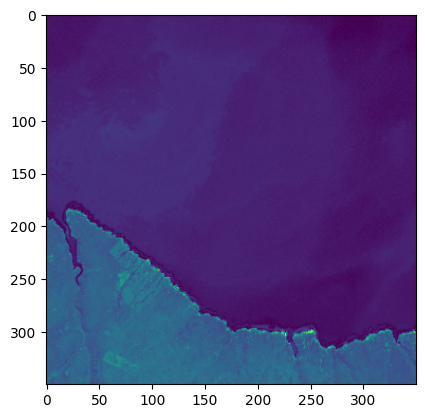

In [ ]:
plt.imshow(cvi)

In [ ]:
from matplotlib.pyplot import imshow

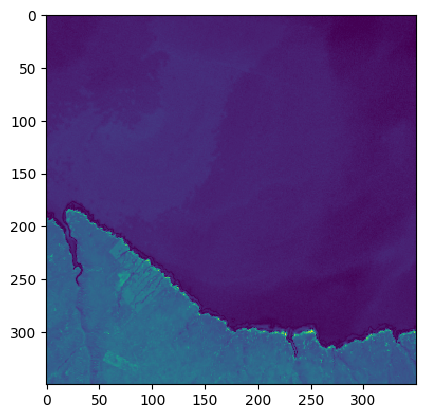

In [ ]:
# Use bilinear interpolation (or it is displayed as bicubic by default).
imshow(cvi, interpolation="nearest")


In [ ]:
pip install h5py

In [ ]:
pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 3.3 MB/s eta 0:00:00


In [ ]:
from spectral import *

In [ ]:
import earthpy.plot as ep

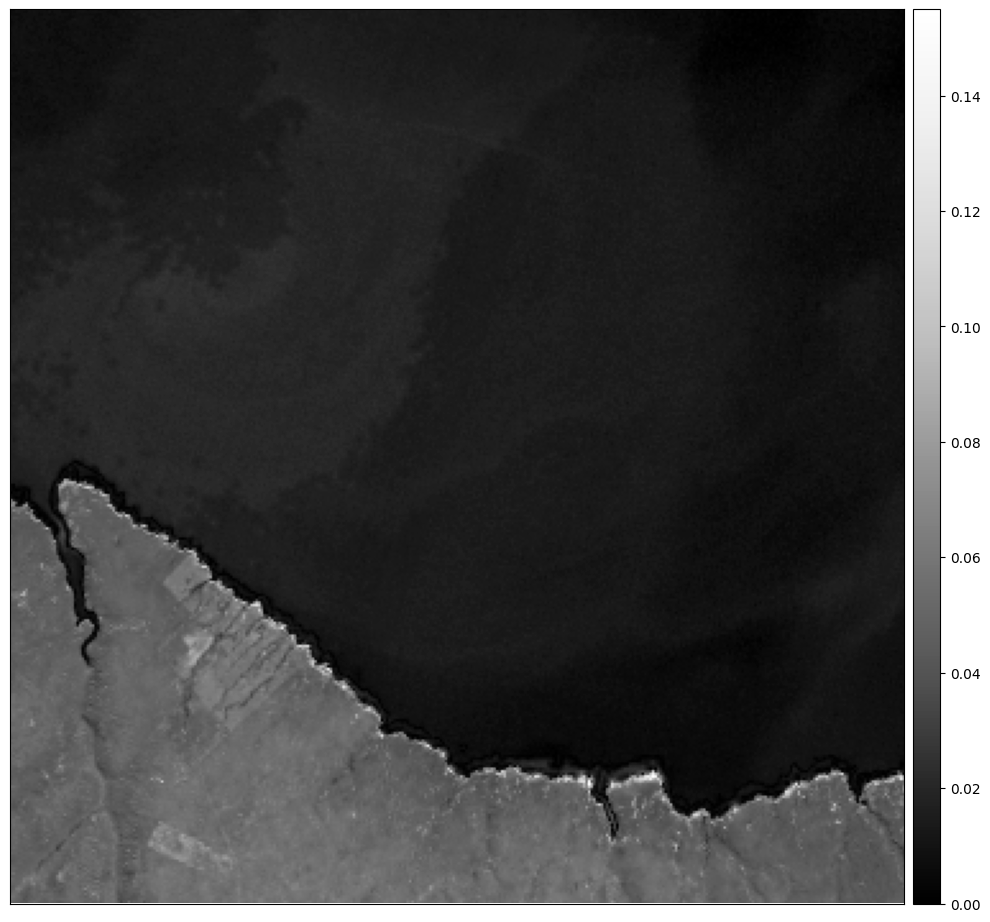

In [ ]:
ep.plot_bands(cvi)
plt.show()

In [ ]:
max = cvi.max()
min = cvi.min()

In [ ]:
max

0.15496425358647792

In [ ]:
min

0.0

In [ ]:
filter_data = np.where(cvi>= max -0.08, cvi, 0)

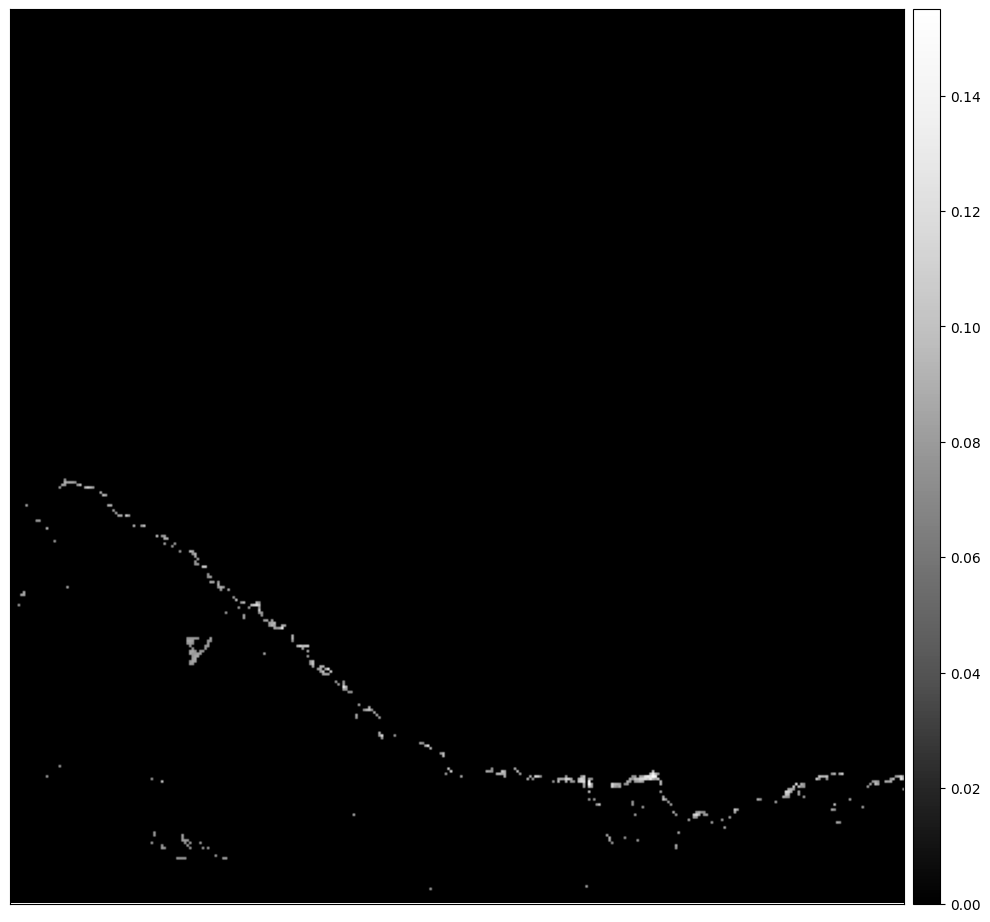

In [ ]:
ep.plot_bands(filter_data)
plt.show()

In [ ]:
##############            Prepare CVI list of All Train Labelled(Ground Truth) Images  with "kelp" in their names

In [ ]:
path_labelled_data='/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Train Features/train_labels.tar_l8u2RP0/train_kelp'

In [ ]:
all_labelled_images=os.listdir(path_labelled_data)

In [ ]:
len(all_labelled_images)

5635

In [ ]:
all_labelled_images[0:5]

['TI542629_kelp.tif',
 'HG365959_kelp.tif',
 'OC869721_kelp.tif',
 'GB182042_kelp.tif',
 'YK361224_kelp.tif']

To get the reflectance values, we need to rescale all values dividing the entire array by 10000:
https://geobgu.xyz/py_2022/rasterio1.html

Now that we have a float64 raster with values between 0 and 1, we can observe an RGB image of the raster as follows:

show(r[[2, 1, 0], :, :]);

In [ ]:
mean_reflectance_list_labelled_images=[]
max_reflectance_list_labelled_images=[]
min_reflectance_list_labelled_images=[]
for i in range(len(all_labelled_images)):
  with rasterio.open(path_labelled_data+'/'+all_labelled_images[i]) as src:
    data_array=src.read(1)    #### Only one band labelled Data
    data_array=data_array/10000
    max_reflectance_list_labelled_images.append(data_array.max())
    min_reflectance_list_labelled_images.append(data_array.min())
    mean_reflectance_list_labelled_images.append(data_array.mean())






In [ ]:
import pandas as pd

In [ ]:
df_labelled_images_reflectance = pd.DataFrame(mean_reflectance_list_labelled_images, columns=['Mean Reflectance'])
df_labelled_images_reflectance

,Mean Reflectance
0,5.371429e-07
1,0.000000e+00
2,2.540408e-06
3,1.073469e-06
4,7.428571e-08
...,...
5630,3.387755e-07
5631,2.367347e-08
5632,2.628571e-07
5633,7.020408e-08


In [ ]:
df_labelled_images_reflectance['min_reflectance'] = min_reflectance_list_labelled_images
df_labelled_images_reflectance['max_reflectance']=  max_reflectance_list_labelled_images

In [ ]:
df_labelled_images_reflectance.describe()

,Mean Reflectance,min_reflectance,max_reflectance
count,5.635000e+03,5635.0,5635.000000
mean,6.768678e-07,0.0,0.000063
std,2.200259e-06,0.0,0.000048
min,0.000000e+00,0.0,0.000000
25%,0.000000e+00,0.0,0.000000
50%,9.142857e-08,0.0,0.000100
75%,7.183673e-07,0.0,0.000100
max,9.270449e-05,0.0,0.000100


In [ ]:
df_labelled_images_reflectance.to_csv('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Train Features/df_labelled_images_reflectance.csv')

In [ ]:
df_labelled_images_reflectance.head()

,Mean Reflectance,min_reflectance,max_reflectance
0,5.371429e-07,0.0,0.0001
1,0.000000e+00,0.0,0.0000
2,2.540408e-06,0.0,0.0001
3,1.073469e-06,0.0,0.0001
4,7.428571e-08,0.0,0.0001


In [ ]:
df_labelled_images_reflectance['Mean Reflectance'] = df_labelled_images_reflectance['Mean Reflectance'] * 10000

In [ ]:
df_labelled_images_reflectance.head()

,Mean Reflectance,min_reflectance,max_reflectance
0,0.005371,0.0,0.0001
1,0.000000,0.0,0.0000
2,0.025404,0.0,0.0001
3,0.010735,0.0,0.0001
4,0.000743,0.0,0.0001


In [ ]:
path_test_Not_labelled_7_band_data ='/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Test Features/test_features.tar_cVzb1K0/test_satellite'

In [ ]:
All_Not_labelled_data_images_list = os.listdir(path_test_Not_labelled_7_band_data)

In [ ]:
All_Not_labelled_data_images_list[0:5]   ##### Not labelled images don't have "kelp" in names

['GD935309_satellite.tif',
 'PP284888_satellite.tif',
 'ZY575159_satellite.tif',
 'SK539422_satellite.tif',
 'XB663463_satellite.tif']

In [ ]:
len(All_Not_labelled_data_images_list)

1426

In [ ]:
Green_reflectance_list_Not_labelled_images=[]
NIR_reflectance_list_Not_labelled_images=[]
cvi_reflectance_list_Not_labelled_images=[]
cvi_reflectance_list_Not_labelled_images_min=[]
cvi_reflectance_list_Not_labelled_images_max=[]
for i in range(len(All_Not_labelled_data_images_list)):
  with rasterio.open(path_test_Not_labelled_7_band_data+'/'+All_Not_labelled_data_images_list[i]) as src:
    Green=src.read(3)    #### Only one out of 7 bands NOT labelled Data
    NIR = src.read(5)
    cvi = abs((Green -NIR) / (Green + NIR))
    Green_reflectance_list_Not_labelled_images.append(Green.mean())
    NIR_reflectance_list_Not_labelled_images.append(NIR.mean())
    cvi_reflectance_list_Not_labelled_images.append(cvi.mean())
    cvi_reflectance_list_Not_labelled_images_min.append(cvi.min())
    cvi_reflectance_list_Not_labelled_images_max.append(cvi.max())



In [ ]:
df_Not_labelled_images_reflectance = pd.DataFrame(cvi_reflectance_list_Not_labelled_images, columns=['Mean Reflectance'])
df_Not_labelled_images_reflectance

,Mean Reflectance
0,0.026210
1,0.042957
2,0.028164
3,0.027128
4,0.035837
...,...
1421,0.041307
1422,0.028100
1423,0.029105
1424,0.035649


In [ ]:
df_Not_labelled_images_reflectance['cvi Min'] = cvi_reflectance_list_Not_labelled_images_min
df_Not_labelled_images_reflectance['cvi Max'] = cvi_reflectance_list_Not_labelled_images_max
df_Not_labelled_images_reflectance['Green'] = Green_reflectance_list_Not_labelled_images
df_Not_labelled_images_reflectance['NIR'] = NIR_reflectance_list_Not_labelled_images
df_Not_labelled_images_reflectance['images']=All_Not_labelled_data_images_list

In [ ]:
df_Not_labelled_images_reflectance.head()

,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images
0,0.026210,0.000000,0.131451,8505.616604,8527.619282,GD935309_satellite.tif
1,0.042957,0.000000,0.138197,9442.848400,8821.127747,PP284888_satellite.tif
2,0.028164,0.000000,0.168446,9332.627069,9355.326914,ZY575159_satellite.tif
3,0.027128,0.000000,0.181175,9548.647355,9398.686098,SK539422_satellite.tif
4,0.035837,0.000089,0.195490,8774.165331,8733.073967,XB663463_satellite.tif


In [ ]:
df_Not_labelled_images_reflectance.to_csv('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Test Features/df_Not_labelled_images_reflectance.csv')

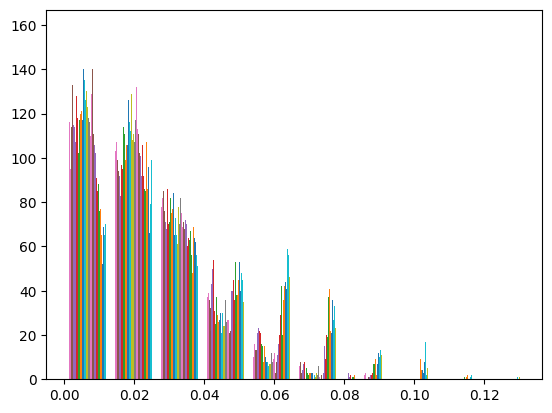

In [ ]:
import matplotlib.pyplot as plt
plt.hist(cvi)
plt.show()

In [ ]:
cvi.mean()

0.02620965458468486

In [ ]:
Green.mean()/10000

0.8505616604081634

In [ ]:
NIR.mean()/10000

0.8527619281632653

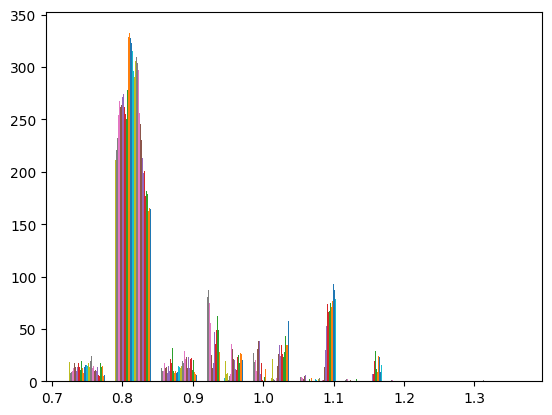

In [ ]:
plt.hist(Green/10000)
plt.show()

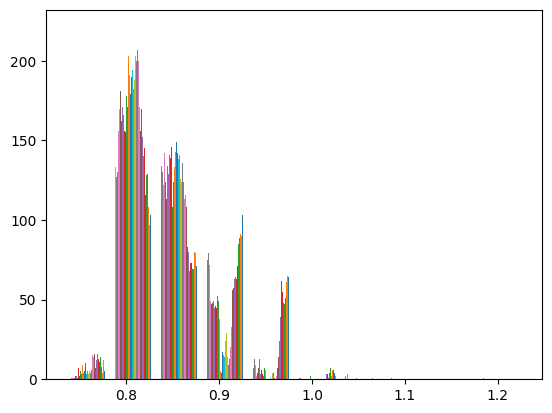

In [ ]:
plt.hist(NIR/10000)
plt.show()

In [ ]:
####          https://machinelearningmastery.com/quantile-transforms-for-machine-learning/

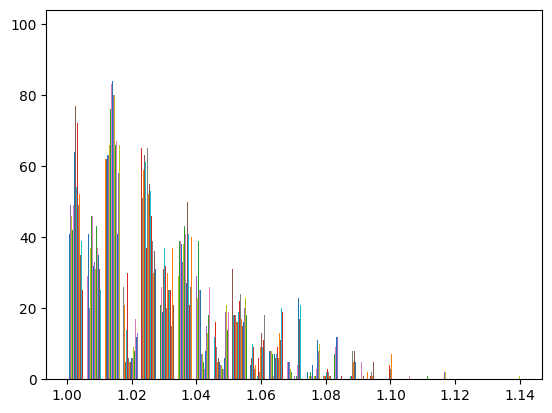

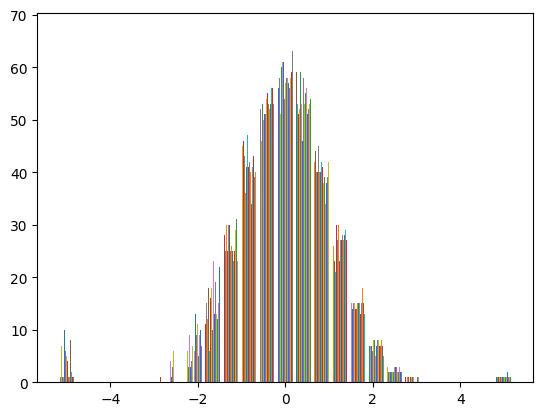

In [ ]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
####data = randn(1000)

data = cvi


# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
###########data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')


# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(n_quantiles=1426, output_distribution="normal") #### https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

In [45]:
df_train_labelled = pd.read_csv('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Train Features/df_labelled_images_reflectance.csv')

In [ ]:
df_test_NOT_labelled= pd.read_csv('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Test Features/df_Not_labelled_images_reflectance.csv')

In [ ]:
df_train_labelled.describe()


,Unnamed: 0,Mean Reflectance,min_reflectance,max_reflectance
count,5635.000000,5.635000e+03,5635.0,5635.000000
mean,2817.000000,6.768678e-07,0.0,0.000063
std,1626.828715,2.200259e-06,0.0,0.000048
min,0.000000,0.000000e+00,0.0,0.000000
25%,1408.500000,0.000000e+00,0.0,0.000000
50%,2817.000000,9.142857e-08,0.0,0.000100
75%,4225.500000,7.183673e-07,0.0,0.000100
max,5634.000000,9.270449e-05,0.0,0.000100


In [ ]:
df_train_labelled.head()

,Unnamed: 0,Mean Reflectance,min_reflectance,max_reflectance
0,0,5.371429e-07,0.0,0.0001
1,1,0.000000e+00,0.0,0.0000
2,2,2.540408e-06,0.0,0.0001
3,3,1.073469e-06,0.0,0.0001
4,4,7.428571e-08,0.0,0.0001


In [ ]:
df_test_NOT_labelled.describe()

,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,712.500000,0.038289,0.000028,2.242487,7110.710142,6905.358156
std,411.795054,0.037913,0.000183,44.786098,5550.378430,5513.644904
min,0.000000,0.002644,0.000000,0.038217,-29933.076596,-30002.607796
25%,356.250000,0.023909,0.000000,0.141708,7835.210637,7912.217612
50%,712.500000,0.032256,0.000000,0.173276,8460.166673,8387.210665
75%,1068.750000,0.042335,0.000000,0.403819,9146.572147,8815.494708
max,1425.000000,0.729695,0.004195,1395.382979,34080.612318,36101.682963


In [ ]:
df_test_NOT_labelled.head()

,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images
0,0,0.026210,0.000000,0.131451,8505.616604,8527.619282,GD935309_satellite.tif
1,1,0.042957,0.000000,0.138197,9442.848400,8821.127747,PP284888_satellite.tif
2,2,0.028164,0.000000,0.168446,9332.627069,9355.326914,ZY575159_satellite.tif
3,3,0.027128,0.000000,0.181175,9548.647355,9398.686098,SK539422_satellite.tif
4,4,0.035837,0.000089,0.195490,8774.165331,8733.073967,XB663463_satellite.tif


In [ ]:
MEAN_of_All_Train_labelled_images = df_train_labelled['Mean Reflectance'].mean()

In [ ]:
MEAN_of_All_Train_labelled_images*10000

0.006768678268112925

In [ ]:
MIN_of_All_Train_labelled_images = df_train_labelled['min_reflectance'].min()

In [ ]:
MIN_of_All_Train_labelled_images

0.0

In [ ]:
MAX_of_All_Train_labelled_images = df_train_labelled['max_reflectance'].max()
MAX_of_All_Train_labelled_images*10000

1.0

Mean of means from labelled images = 0.006768678268112925
Max.............................. = 1.0

Label Canopy to Test images only if... 0.006768678268112925 < CVI < 1


In [ ]:
MEAN = MEAN_of_All_Train_labelled_images * 10000
MAX = MAX_of_All_Train_labelled_images * 10000
label=[]
for row in range(len(df_test_NOT_labelled)):
    if  (df_test_NOT_labelled['Mean Reflectance'][row] > MEAN and df_test_NOT_labelled['Mean Reflectance'][row]< MAX):
        label.append(1)
    else:
        label.append(0)

In [ ]:
df_test_NOT_labelled['Label'] = label

In [ ]:
label.count(1)

1418

In [ ]:
label.count(0)

8

In [ ]:
df_test_NOT_labelled.head()

,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
0,0,0.026210,0.000000,0.131451,8505.616604,8527.619282,GD935309_satellite.tif,1
1,1,0.042957,0.000000,0.138197,9442.848400,8821.127747,PP284888_satellite.tif,1
2,2,0.028164,0.000000,0.168446,9332.627069,9355.326914,ZY575159_satellite.tif,1
3,3,0.027128,0.000000,0.181175,9548.647355,9398.686098,SK539422_satellite.tif,1
4,4,0.035837,0.000089,0.195490,8774.165331,8733.073967,XB663463_satellite.tif,1


In [ ]:
df_test_NOT_labelled.to_csv('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Test Features/df_test_ALL_labelled.csv')

################################     Found 8 tset images labelled 0 i.e Not "kelp"......................
Look at the CVI of these 8 images and sort the CVI of All labelled images for analysis..........

In [2]:
import pandas as pd

In [46]:
df_test_labelled = pd.read_csv('/content/drive/MyDrive/KELP forest Satellite imagery Project Data/Test Features/df_test_ALL_labelled.csv')

In [47]:
df_test_labelled.describe()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000
mean,712.500000,712.500000,0.038289,0.000028,2.242487,7110.710142,6905.358156,0.994390
std,411.795054,411.795054,0.037913,0.000183,44.786098,5550.378430,5513.644904,0.074716
min,0.000000,0.000000,0.002644,0.000000,0.038217,-29933.076596,-30002.607796,0.000000
25%,356.250000,356.250000,0.023909,0.000000,0.141708,7835.210637,7912.217612,1.000000
50%,712.500000,712.500000,0.032256,0.000000,0.173276,8460.166673,8387.210665,1.000000
75%,1068.750000,1068.750000,0.042335,0.000000,0.403819,9146.572147,8815.494708,1.000000
max,1425.000000,1425.000000,0.729695,0.004195,1395.382979,34080.612318,36101.682963,1.000000


In [6]:
df_test_labelled.head()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
0,0,0,0.026210,0.000000,0.131451,8505.616604,8527.619282,GD935309_satellite.tif,1
1,1,1,0.042957,0.000000,0.138197,9442.848400,8821.127747,PP284888_satellite.tif,1
2,2,2,0.028164,0.000000,0.168446,9332.627069,9355.326914,ZY575159_satellite.tif,1
3,3,3,0.027128,0.000000,0.181175,9548.647355,9398.686098,SK539422_satellite.tif,1
4,4,4,0.035837,0.000089,0.195490,8774.165331,8733.073967,XB663463_satellite.tif,1


In [48]:
labelled_1_df = df_test_labelled[df_test_labelled['Label'] == 1]

In [49]:
labelled_1_df

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
0,0,0,0.026210,0.000000,0.131451,8505.616604,8527.619282,GD935309_satellite.tif,1
1,1,1,0.042957,0.000000,0.138197,9442.848400,8821.127747,PP284888_satellite.tif,1
2,2,2,0.028164,0.000000,0.168446,9332.627069,9355.326914,ZY575159_satellite.tif,1
3,3,3,0.027128,0.000000,0.181175,9548.647355,9398.686098,SK539422_satellite.tif,1
4,4,4,0.035837,0.000089,0.195490,8774.165331,8733.073967,XB663463_satellite.tif,1
...,...,...,...,...,...,...,...,...,...
1421,1421,1421,0.041307,0.000061,0.151831,9313.095102,8688.871208,ZG901351_satellite.tif,1
1422,1422,1422,0.028100,0.000000,0.177530,9387.382139,9299.642604,AP184643_satellite.tif,1
1423,1423,1423,0.029105,0.000000,0.149064,9158.125469,9314.344147,SB239849_satellite.tif,1
1424,1424,1424,0.035649,0.000093,0.161036,8823.658465,8300.851502,YP825990_satellite.tif,1


In [50]:
labelled_1_df.describe()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.000000,1418.0
mean,712.612130,712.612130,0.038475,0.000028,2.252605,7260.699609,7054.231932,1.0
std,412.450674,412.450674,0.037939,0.000183,44.912126,5109.401682,5075.053082,0.0
min,0.000000,0.000000,0.007021,0.000000,0.038217,-24916.319494,-24913.430702,1.0
25%,356.250000,356.250000,0.024086,0.000000,0.141808,7845.909135,7928.596796,1.0
50%,712.500000,712.500000,0.032315,0.000000,0.173276,8469.120645,8391.100278,1.0
75%,1070.750000,1070.750000,0.042425,0.000000,0.403338,9150.301108,8815.857282,1.0
max,1425.000000,1425.000000,0.729695,0.004195,1395.382979,34080.612318,36101.682963,1.0


In [51]:
labelled_0_df = df_test_labelled[df_test_labelled['Label'] == 0]

In [52]:
labelled_0_df.describe()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,8.000000,8.000000,8.000000,8.0,8.000000,8.000000,8.000000,8.0
mean,692.625000,692.625000,0.005371,0.0,0.449018,-19474.922808,-19482.518706,0.0
std,289.750601,289.750601,0.001489,0.0,0.532929,13207.678735,13212.153669,0.0
min,250.000000,250.000000,0.002644,0.0,0.045895,-29933.076596,-30002.607796,0.0
25%,525.750000,525.750000,0.004665,0.0,0.111877,-28179.501176,-28225.381737,0.0
50%,757.500000,757.500000,0.005921,0.0,0.236500,-24118.091400,-24139.728661,0.0
75%,923.750000,923.750000,0.006483,0.0,0.526097,-18265.918571,-18250.313245,0.0
max,998.000000,998.000000,0.006747,0.0,1.582496,7522.184180,7475.328163,0.0


SORT all CVI   and Reject -ve   Values as these represents noise/false data

In [17]:
sorted_labelled_1_df = labelled_1_df.sort_values(by=['Mean Reflectance'])

In [19]:
sorted_labelled_1_df.tail()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
98,98,98,0.300015,0.000000,0.967033,7936.492147,6491.324318,YL576378_satellite.tif,1
97,97,97,0.309747,0.000000,0.966879,9465.073331,7114.511192,QD867543_satellite.tif,1
512,512,512,0.395508,0.002035,441.810811,7132.131951,5144.431837,YF167793_satellite.tif,1
516,516,516,0.504218,0.000000,850.116883,-11936.636604,-16827.161967,FP798130_satellite.tif,1
514,514,514,0.729695,0.000119,1395.382979,9990.040612,3816.485910,KY338777_satellite.tif,1


In [20]:
  sorted_labelled_1_df.head()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
1308,1308,1308,0.007021,0.0,0.290148,-24397.554163,-24292.003624,YS234475_satellite.tif,1
1091,1091,1091,0.007264,0.0,0.896609,-19767.897061,-19819.180751,XV651963_satellite.tif,1
865,865,865,0.007349,0.0,0.114810,7728.478857,7614.349714,DE916615_satellite.tif,1
549,549,549,0.007554,0.0,0.098779,8475.827453,8384.120139,GA117007_satellite.tif,1
844,844,844,0.007752,0.0,0.168065,-24816.762220,-24913.430702,FM793211_satellite.tif,1


In [26]:
Green_NEGATIVE_labelled_1_df = labelled_1_df[labelled_1_df['Green'] <0]

In [27]:
Green_NEGATIVE_labelled_1_df.describe()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,93.000000,93.000000,93.000000,93.0,93.000000,93.000000,93.000000,93.0
mean,822.129032,822.129032,0.026949,0.0,9.574905,-9780.005140,-9925.687088,1.0
std,309.233598,309.233598,0.052713,0.0,88.108439,6699.079330,6700.244361,0.0
min,31.000000,31.000000,0.007021,0.0,0.057243,-24916.319494,-24913.430702,1.0
25%,756.000000,756.000000,0.013162,0.0,0.156892,-14483.432229,-14483.637935,1.0
50%,819.000000,819.000000,0.018836,0.0,0.210307,-7599.984637,-7920.082980,1.0
75%,1006.000000,1006.000000,0.025353,0.0,0.725286,-4728.439820,-4717.306996,1.0
max,1411.000000,1411.000000,0.504218,0.0,850.116883,-85.905804,254.219045,1.0


In [28]:
Green_NEGATIVE_labelled_1_df.head()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
31,31,31,0.008861,0.0,0.128729,-24916.319494,-24829.131069,UF901834_satellite.tif,1
104,104,104,0.112301,0.0,0.934984,-8740.397804,-9464.553094,CF841561_satellite.tif,1
119,119,119,0.012259,0.0,0.322735,-8878.332163,-8801.162082,VO804900_satellite.tif,1
149,149,149,0.125906,0.0,0.833677,-10669.757151,-11423.391706,OK930382_satellite.tif,1
151,151,151,0.012792,0.0,0.091285,-15009.569951,-14790.833233,OU419443_satellite.tif,1


In [29]:
NIR_Negative_labelled_1_df = labelled_1_df[labelled_1_df['NIR'] <0]

In [30]:
NIR_Negative_labelled_1_df.describe()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.0
mean,806.705263,806.705263,0.028698,0.0,9.393261,-9561.998446,-9733.016967,1.0
std,313.938159,313.938159,0.054093,0.0,87.174960,6793.813779,6758.539407,0.0
min,31.000000,31.000000,0.007021,0.0,0.057243,-24916.319494,-24913.430702,1.0
25%,641.000000,641.000000,0.013198,0.0,0.159764,-14443.106102,-14478.230502,1.0
50%,817.000000,817.000000,0.018871,0.0,0.247586,-7564.654278,-7724.541494,1.0
75%,986.500000,986.500000,0.026121,0.0,0.765427,-4541.224192,-4494.748420,1.0
max,1411.000000,1411.000000,0.504218,0.0,850.116883,758.327061,-79.433682,1.0


In [31]:
NIR_Negative_labelled_1_df.head()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
31,31,31,0.008861,0.0,0.128729,-24916.319494,-24829.131069,UF901834_satellite.tif,1
104,104,104,0.112301,0.0,0.934984,-8740.397804,-9464.553094,CF841561_satellite.tif,1
119,119,119,0.012259,0.0,0.322735,-8878.332163,-8801.162082,VO804900_satellite.tif,1
149,149,149,0.125906,0.0,0.833677,-10669.757151,-11423.391706,OK930382_satellite.tif,1
151,151,151,0.012792,0.0,0.091285,-15009.569951,-14790.833233,OU419443_satellite.tif,1


In [32]:
BOTH_green_and_nir_negative_1_df  = labelled_1_df[(labelled_1_df['Green'] <0) & (labelled_1_df['NIR'] <0)]

In [33]:
BOTH_green_and_nir_negative_1_df.describe()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,92.000000,92.000000,92.000000,92.0,92.000000,92.000000,92.000000,92.0
mean,818.967391,818.967391,0.026917,0.0,9.677425,-9885.375785,-10036.338241,1.0
std,309.413002,309.413002,0.053001,0.0,88.585651,6657.845112,6650.972289,0.0
min,31.000000,31.000000,0.007021,0.0,0.057243,-24916.319494,-24913.430702,1.0
25%,743.000000,743.000000,0.013141,0.0,0.157440,-14552.030780,-14560.436759,1.0
50%,818.500000,818.500000,0.018609,0.0,0.211607,-7666.916792,-7967.297151,1.0
75%,995.500000,995.500000,0.025155,0.0,0.733461,-4791.864676,-4735.701716,1.0
max,1411.000000,1411.000000,0.504218,0.0,850.116883,-160.508180,-79.433682,1.0


In [53]:
df_test_labelled.drop(df_test_labelled[df_test_labelled['Green'] <0].index, inplace = True)


In [54]:
df_test_labelled.drop(df_test_labelled[df_test_labelled['NIR'] <0].index, inplace = True)

In [55]:
df_test_labelled.describe()     ###### Cleaned test labelled data after removing negative NIR and Green Reflectance

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,Label
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,705.701436,705.701436,0.039158,0.000030,1.740059,8474.429318,8265.123659,0.999244
std,417.799294,417.799294,0.036444,0.000189,40.221459,1687.669317,1614.216479,0.027493
min,0.000000,0.000000,0.004983,0.000000,0.038217,285.550694,169.858776,0.000000
25%,340.500000,340.500000,0.024949,0.000000,0.140986,7973.157012,8059.995718,1.000000
50%,689.000000,689.000000,0.033202,0.000000,0.172114,8530.649127,8446.554506,1.000000
75%,1076.500000,1076.500000,0.042959,0.000000,0.346990,9205.785971,8842.620992,1.000000
max,1425.000000,1425.000000,0.729695,0.004195,1395.382979,34080.612318,36101.682963,1.000000


In [58]:
df_test_labelled.head()

,Unnamed: 0.1,Unnamed: 0,Mean Reflectance,cvi Min,cvi Max,Green,NIR,images,Label
0,0,0,0.026210,0.000000,0.131451,8505.616604,8527.619282,GD935309_satellite.tif,1
1,1,1,0.042957,0.000000,0.138197,9442.848400,8821.127747,PP284888_satellite.tif,1
2,2,2,0.028164,0.000000,0.168446,9332.627069,9355.326914,ZY575159_satellite.tif,1
3,3,3,0.027128,0.000000,0.181175,9548.647355,9398.686098,SK539422_satellite.tif,1
4,4,4,0.035837,0.000089,0.195490,8774.165331,8733.073967,XB663463_satellite.tif,1
